<a href="https://colab.research.google.com/github/wilkinisprofissional/TRAB_IA/blob/main/ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TRABALHO DE INTELIGÊNCIA ARTIFICIAL 2023.1
# FRANCISCO WILKINIS PEREIRA DE SOUSA - 472942

# DESCRIÇÃO DO TRABALHO:
# Realizar a probabilidade de sobrevivência do Titanic usando o algoritmo Random Forest e avaliação de desempenho com as métricas: precisão, recall, F1-score

import pandas as pd #importação do pandas, biblioteca de manipulação e análise de dados.
from sklearn.metrics import precision_score # metrica de desempenho
from sklearn.metrics import recall_score  # metrica de desempenho
from sklearn.metrics import f1_score  # metrica de desempenho

import matplotlib.pyplot as plt #importação do matplotlib, biblioteca de visualização de dados em Python.
import seaborn as sns #importa a biblioteca seaborn, biblioteca de visualização de dados baseada no matplotlib.
import numpy as np #importação do numpy, uma biblioteca numérica de Python que fornece suporte para arrays multidimensionais entre outros
from sklearn.ensemble import RandomForestClassifier # importação da biblioteca de aprendizado de máquina em Python que possui diversos algoritmos e ferramentas para análise de dados.
from sklearn.model_selection import train_test_split #Já esta função é utilizada para dividir um conjunto de dados em subconjuntos de treinamento e teste, que são necessários para avaliação de modelos de aprendizado de máquina.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wilkinisprofissional/TRAB_IA/main/titanic.csv")
#criação do dataframe sendo utilizado conexão pelo github, tentei puxar pelo drive mas não consegui, estava dando uns errinhos chatos

In [ ]:
df.head() #visualização dos dados das primeiras colunas do dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe() #descrição geral do dataframe no início, dados brutos ainda não tratador

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df.drop(['Name','Ticket','Cabin','Embarked'], axis=1)
# necessário então realizar o tratamento destes dados para que não hajam resultados
# inconclusivos na moldura do nosso algoritmo. Realiza-se agora o início do tratamento a partir da
# função drop que irá remover estas colunas que não são necessárias para a análise, no caso, as
# colunas "Name", "Ticket", "Cabin"e "Embarked"

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
df = df.set_index('PassengerId')
df = df.rename(columns = {'Survived' : 'target'}, inplace = False)
# O próximo passo é transformar a ID (Identificação) do Passageiro como chave
# primária do nosso banco, e renomear a coluna Survived para "Target", para a verificação da
# probalidade de sobrevivência dos tripulantes


In [ ]:
df.describe() # descrição geral do dataframe

,target,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])
#aqui realiza-se a análise das variáveis categórias, usa-se esse comando de descrição passando
# como parâmetro o include=['0'] para resgatar de uma vez os valores do data frame

,Sex
count,891
unique,2
top,male
freq,577


In [ ]:
# aqui ocorre a transformação dos dados
# vamos somente utilizar a referência 1 ou 0 para definir se um dado aparece ou não no dataframe
df['Sex_F'] = np.where(df['Sex'] == 'female', 1, 0) #aqui a designação de sexo feminina

df['Pclass_1'] = np.where(df['Pclass'] == 1, 1, 0)# classes da tripulação caso a 1a classe apareça
df['Pclass_2'] = np.where(df['Pclass'] == 2, 1, 0)# caso a 2a classe apareça
df['Pclass_3'] = np.where(df['Pclass'] == 3, 1, 0)# caso a 3a classe apareça

In [ ]:
df = df.drop(['Pclass','Sex'], axis = 1) #como foram criadas novas colunas, pode-se remover estas agora

In [ ]:
df.head() # como fica nossa tabela, somente as 5 primeiras linhas de valores

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1
2,1,38.0,1,0,71.2833,1,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,1
4,1,35.0,1,0,53.1000,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,0,1


In [ ]:
df.isnull().sum()
#aqui verificamos se há dados faltantes no dataframe

target        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_F         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [ ]:
df.fillna(0, inplace= True) # daí só trocar esses dados que faltam por 0

In [ ]:
df.isnull().sum() # e verificar novamente, como está tudo ok, todas as saídas são 0, já que não há mais linhas sem dados

target      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_F       0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

In [ ]:
# nesse momento já se começa a utilizar as funções para realizar o teste e o treinamento do modelo
# usando a função train_test_split do módulo sklearn.model_selection.
                                                                                    # aqui função train_test_split está sendo chamada e seus resultados estão sendo atribuídos a quatro variáveis
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 1),  # O primeiro argumento é os dados para treinamento (df.drop(['target'], axis = 1)), onde a coluna target está sendo removida usando o método .drop com axis = 1 indicando que a remoção deve ser feita por coluna.
                                                    df['target'],                   # O próximo argumento é (df['target']), e essa é a variável que queremos prever.
                                                    test_size = 0.3,                # Em test_size = 0.3 especifica que 30% dos dados serão usados ​​para teste, enquanto 70% serão usados ​​para treinamento. Essa é a divisão mencionada anteriormente
                                                    random_state = 1234)            # por fim recebe o argumento random_state = 1234 define uma semente para que os resultados sejam reproduzíveis.

#Daí se utiliza função train_test_split para dividir essses dados em conjuntos de treinamento
# e teste, permitindo que o modelo seja treinado em uma parte dos dados e testado em outra
# parte para avaliar sua capacidade de generalização.

#pronto, o dataframe tá quase pronto pra receber o modelo

[
{'treino': x_train.shape},  # criamos ent~ao um dicionário contendo as informações sobre o formato dos dados de treinamento, onde 'train'
                            # é a chave e x_train.shape é o valor. O x_train.shape retorna uma tupla contendo as dimensões dos dados
                            # de treinamento, no formato (número de linhas, número de colunas).

{'teste': x_test.shape}     # essa linha cria outro dicionário contendo as informações sobre o formato dos dados de teste, onde 'test'
                            # é a chave e x_test.shape é o valor. O x_test.shape retorna uma tupla contendo as dimensões dos dados de teste,
                            # no formato (número de linhas, número de colunas).
]

#pronto, já temos número de amostras e atributos presentes nos dados de treinamento e teste.

[{'treino': (623, 8)}, {'teste': (268, 8)}]

In [ ]:
#criação do modelo utilizando random forest classifier
rndforest = RandomForestClassifier(n_estimators = 1000, #aqui fazemos a definição do número de árvores que serão construídas na floresta. Para o trabalho serão criadas 1000 árvores.
                                   criterion = 'gini', # definimos a métrica utilizada para avaliar a qualidade da divisão dos nós das árvores. Aqui é utilizado o critério 'gini' que é calcuado em razão as proporções de um diagrama.
                                   max_depth = 5) # estabelece a maior profundidade que a arvore pode ter, nesse caso, só 5
rndforest.fit(x_train, y_train) # pronto, temos a entrada e saida do treinamento

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [ ]:
#agora temos que prever a probabilidade da classe de dados usando random forest
# com a variável "probabilidade" vamos armazenar os valores previstos de probabilidade calculados pelo modelo RandomForestClassifier

probabilidade = rndforest.predict_proba(df.drop('target', axis = 1))[:,1] # aqui em [:,1] ontemos apenas as probabilidades relacionadas à classe 1.
                                                                          # nesse caso, a classe 1 é suposta estar na primeira coluna da matriz retornada
                                                                          # pela função "predict_proba". PLogo, ao fazer [:,1], estaremos pegando todas
                                                                          # as linhas e apenas a coluna 1, que contém a probabilidade da classe 1.

# na função "predict_proba" conseguimos gerar a probabilidade das classes de destino para cada amostra de entrada
# retornando uma matriz 2d onde cada linha representa uma amostra de entrada e cada coluna representa a probabilidade para cada classe.
# nisso conseguimos remove a coluna 'target' do DataFrame para realizar a predição correta e usamos a função "drop" para remover uma determinada coluna do DataFrame.

In [ ]:
df['probabilidade'] = probabilidade

# criamos então uma nova coluna chamada "probabilidade" no DataFrame
# essa nova coluna é preenchida com os valores da variável probabilidade

In [ ]:
df
# Na coluna de probabilidades o algoritmo estima a probabilidade de sobrevivência de cada passageiro

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3,probabilidade
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1,0.123436
2,1,38.0,1,0,71.2833,1,1,0,0,0.931789
3,1,26.0,0,0,7.9250,1,0,0,1,0.452513
4,1,35.0,1,0,53.1000,1,1,0,0,0.914752
5,0,35.0,0,0,8.0500,0,0,0,1,0.137977
...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,0,0,1,0,0.128055
888,1,19.0,0,0,30.0000,1,1,0,0,0.846581
889,0,0.0,1,2,23.4500,1,0,0,1,0.485595


array([<Axes: xlabel='PassengerId'>, <Axes: xlabel='PassengerId'>,
       <Axes: xlabel='PassengerId'>, <Axes: xlabel='PassengerId'>,
       <Axes: xlabel='PassengerId'>, <Axes: xlabel='PassengerId'>,
       <Axes: xlabel='PassengerId'>, <Axes: xlabel='PassengerId'>,
       <Axes: xlabel='PassengerId'>, <Axes: xlabel='PassengerId'>],
      dtype=object)

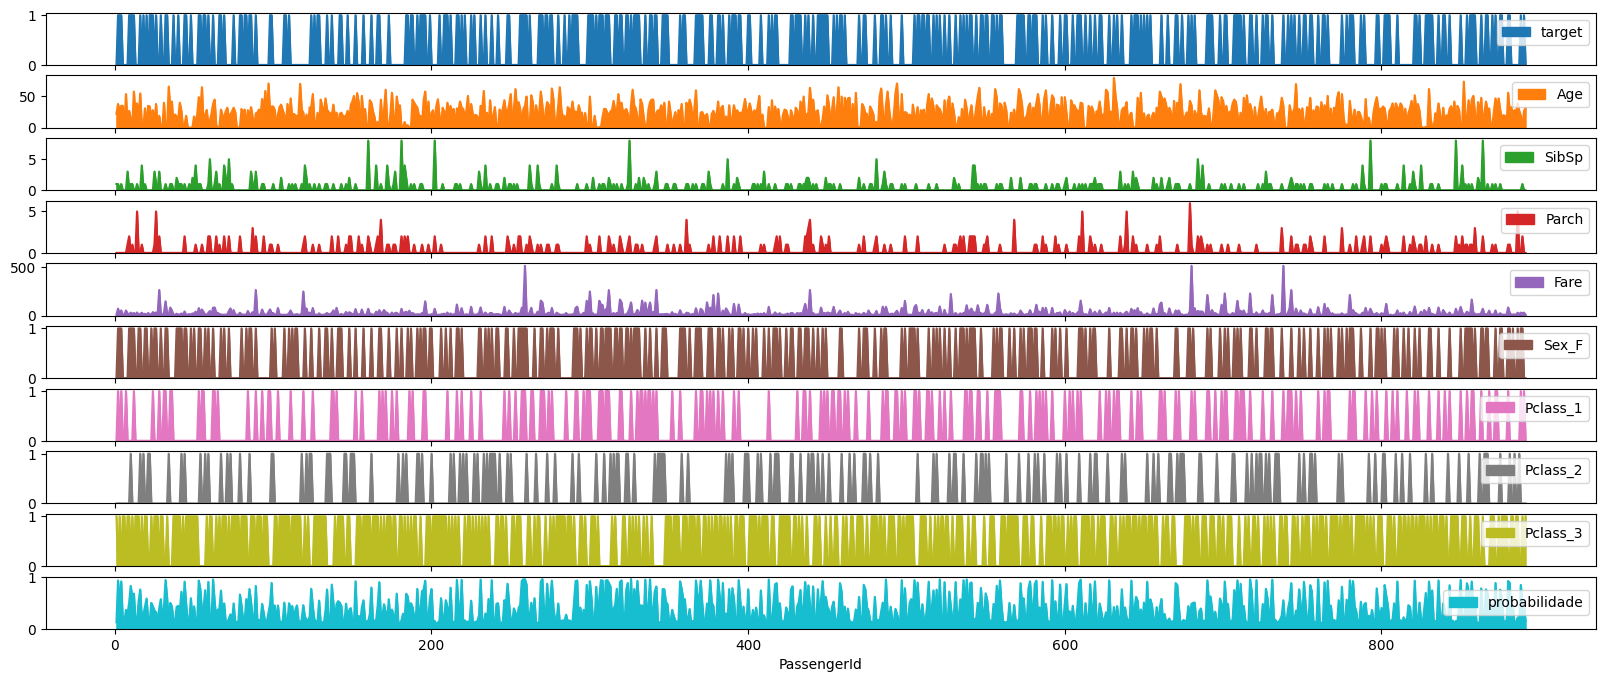

In [ ]:
df.plot.area(figsize=(20, 8), subplots=True) #daí se obtem por meio de grafico os dados representados após todas as verificações e aplicação do algoritmo

In [ ]:
# agora é a aplicação da avaliação de desempenho
y_pred = rndforest.predict(x_test) # armazena-se as previsões do modelo
precisao = precision_score(y_test, y_pred) # calcula-se a precisão de um modelo de classificação, comparando as previsões
                                            # a precisão é uma métrica que vai medir a proporção das previsões positivas corretas
                                            # em relação ao total de previsões positivas. O valor da precisão é armazenado na variável precicao

recall = recall_score(y_test, y_pred)     # aqui calcula o recall do um modelo, comparando as previsões
                                          # O recall é uma métrica que mede a proporção de casos positivos corretamente para que os dados sejam
                                          # identificados em relação ao total de casos positivos. O valor do recall fica armazenado na variável

f1 = f1_score(y_test, y_pred)             # aqui a gente calcula o valor F1 de um modelo de classificação
                                          # que é a média harmônica entre as métricas de precisão e recall.
                                          # O valor de F1 é uma métrica que equilibra a precisão e o recall
                                          # em uma única pontuação. O valor do F1-score é armazenado na variável f1.

#impressao dos valors
print("Precision:", precisao)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8732394366197183
Recall: 0.6078431372549019
F1-score: 0.7167630057803468


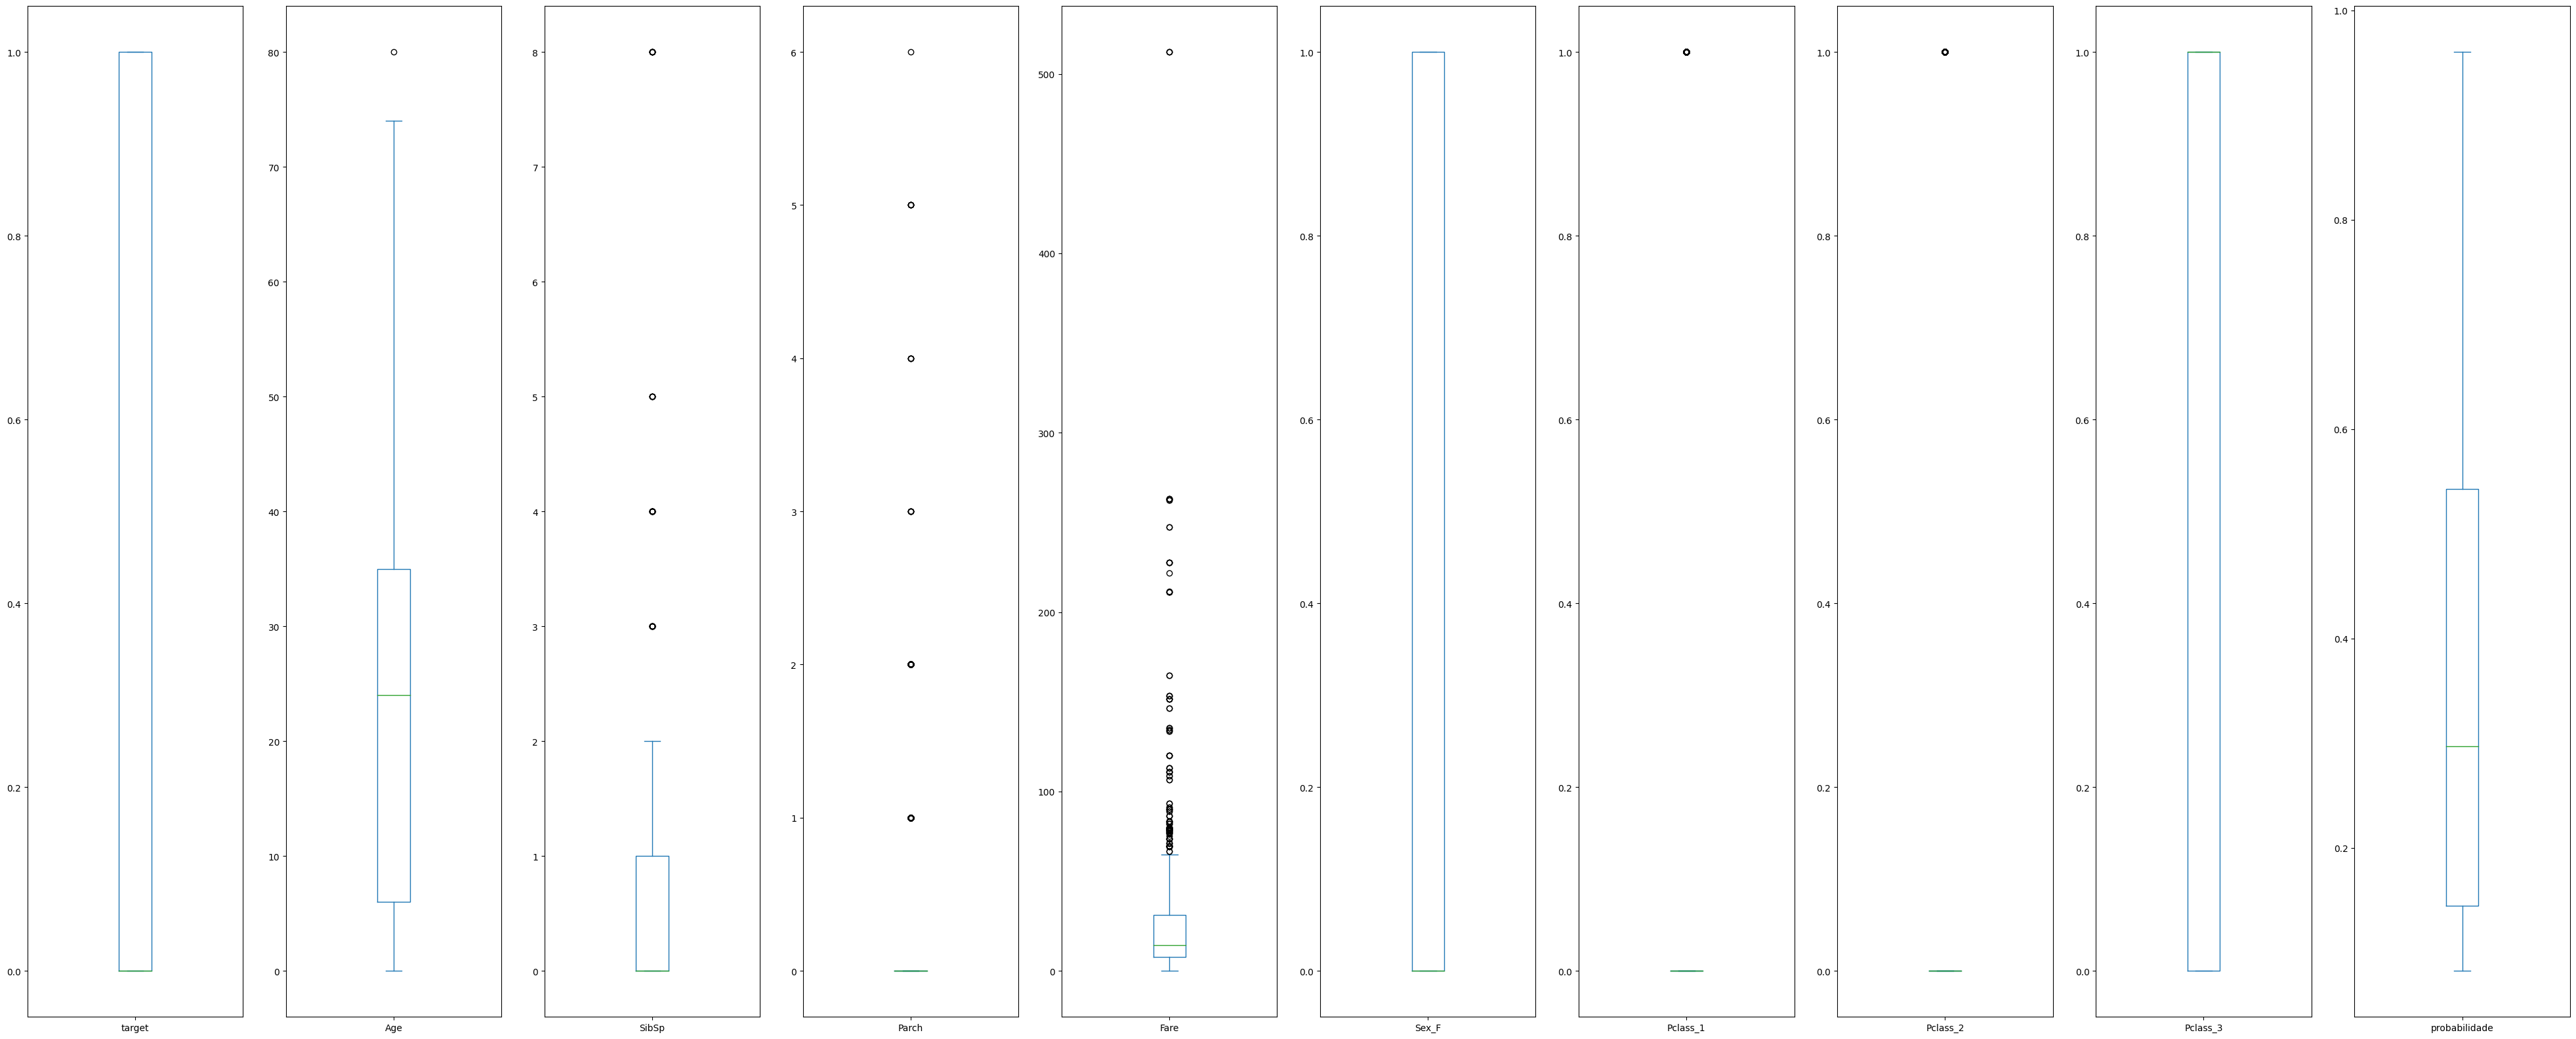

In [48]:
df.plot.box(subplots=True, figsize=(50, 20)); # apenas um gráfico de caixa para visualização dos dados pós inpeção

A análise do resultado de aprendizagem de máquina utilizando o algoritmo Random Forest apresentou uma precisão de 0.873, o que indica que 87.32% das predições realizadas estavam corretas. Isso significa que o modelo possui uma boa capacidade de classificar corretamente os dados em relação às classes previstas.

O recall, que mede a capacidade do modelo em encontrar corretamente todas as instâncias relevantes, obteve um valor de 0.608. Isso significa que o modelo conseguiu identificar corretamente apenas 60.78% das instâncias relevantes. Portanto, há espaço para melhorias na identificação dos casos positivos pelo modelo.

O F1-score, que é uma medida de média harmônica entre a precisão e o recall, alcançou um valor de 0.717. Essa medida indica uma boa harmonia entre a precisão e o recall do modelo, mas também ressalta a possibilidade de aprimoramentos na identificação correta das instâncias relevantes.

No geral, os resultados obtidos sugerem um modelo de aprendizagem de máquina com bom desempenho, especialmente em relação à precisão. No entanto, é importante direcionar esforços para melhorar o recall, afim de aumentar a taxa de detecção de casos positivos relevantes e obter um melhor equilíbrio geral das métricas de avaliação.